In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

## define bucket in which you are trying to reach from Amazon S3 bucket
s3 = boto3.resource('s3')
bucket_name = 'daltondencklau-data445-bucket'
bucket = s3.Bucket(bucket_name)

## define csv file to read in the bucket
file_key= 'CarPrice_Assignment.csv'

## syntax to allow us to read the file
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## reading the data file
car_price = pd.read_csv(file_content_stream)
car_price.head()

Matplotlib is building the font cache; this may take a moment.
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
## defining input and target variables
X = car_price[['wheelbase', 'enginesize', 'compressionratio', 'horsepower', 'peakrpm', 'citympg']]
Y = car_price['price']

## splitting the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [3]:
## min max scaler transformation (standardizing data bc Neural Networks are sensitive to inputs)
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## First model

In [7]:
## defining the model (NN) with one layer
md1 = tf.keras.models.Sequential([
    
    ## defining the one layer with (10 neurons, 6 input varaibles, and activation function)
    tf.keras.layers.Dense(10, input_dim = 6, activation = 'relu'),
    
    ## defining how many layers
    tf.keras.layers.Dense(1)

])

## defining how model will be estimated (optimizer = 'algorithm to estimate weights', loss = 'measure of how I want model to be estimated')
md1.compile(optimizer = 'adam', loss = 'mse')
## loss = MSE 
history = md1.fit(X_train, Y_train, epochs = 100, batch_size = 100, validation_data = (X_test, Y_test))

Epoch 1/100
2/2 [==============================] - 0s 46ms/step - loss: 216285616.0000 - val_loss: 333799200.0000
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 216285088.0000 - val_loss: 333798432.0000
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 216284528.0000 - val_loss: 333797696.0000
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 216283968.0000 - val_loss: 333796992.0000
Epoch 5/100
2/2 [==============================] - 0s 18ms/step - loss: 216283408.0000 - val_loss: 333796192.0000
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 216282880.0000 - val_loss: 333795488.0000
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 216282336.0000 - val_loss: 333794784.0000
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 216281760.0000 - val_loss: 333794016.0000
Epoch 9/100
2/2 [==============================] - 0s 34ms/step - loss: 216281184.0000 -

In [5]:
## making predictions on test data set (comparing predictions and actual values)
md1.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 2ms/step - loss: 333736672.0000


333736672.0

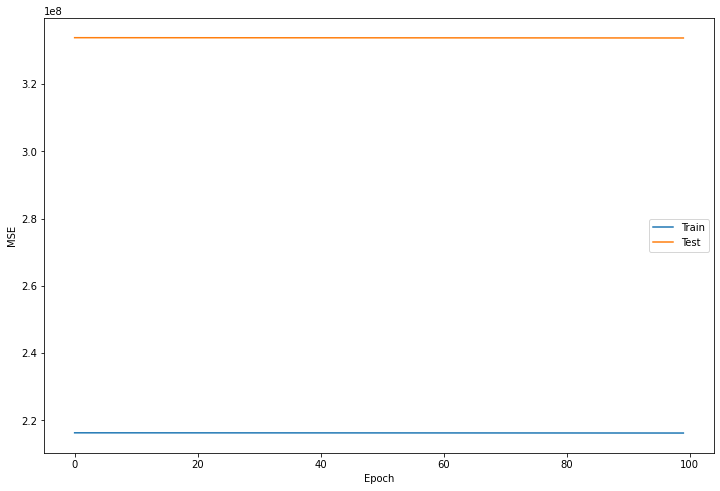

In [15]:
## visualizing results
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Train', 'Test'])
plt.show();

The model is overfitting the data because the model is preforing well only on the training dataset

## Second Model

In [16]:
## defining the model (NN) with 2 layer (10, then 8 neurons)
md2 = tf.keras.models.Sequential([
    
    ## defining the one layer with (10 neurons, 6 input varaibles, and activation function)
    tf.keras.layers.Dense(10, input_dim = 6, activation = 'relu'),
    
    ## defining the second layer with 8 layers
    tf.keras.layers.Dense(8, input_dim = 6, activation = 'relu'),
    
    ## defining how many layers
    tf.keras.layers.Dense(1)

])

## defining how model will be estimated (optimizer = 'algorithm to estimate weights', loss = 'measure of how I want model to be estimated')
md2.compile(optimizer = 'adam', loss = 'mse')
## loss = MSE 
history = md2.fit(X_train, Y_train, epochs = 100, batch_size = 100, validation_data = (X_test, Y_test))

Epoch 1/100
2/2 [==============================] - 0s 87ms/step - loss: 216280144.0000 - val_loss: 333793344.0000
Epoch 2/100
2/2 [==============================] - 0s 30ms/step - loss: 216279920.0000 - val_loss: 333793120.0000
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 216279712.0000 - val_loss: 333792896.0000
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 216279520.0000 - val_loss: 333792704.0000
Epoch 5/100
2/2 [==============================] - 0s 40ms/step - loss: 216279296.0000 - val_loss: 333792480.0000
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 216279088.0000 - val_loss: 333792288.0000
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 216278864.0000 - val_loss: 333792064.0000
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 216278640.0000 - val_loss: 333791808.0000
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 216278384.0000 -

In [18]:
## making predictions on test data set (comparing predictions and actual values)
md2.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 2ms/step - loss: 333624352.0000


333624352.0

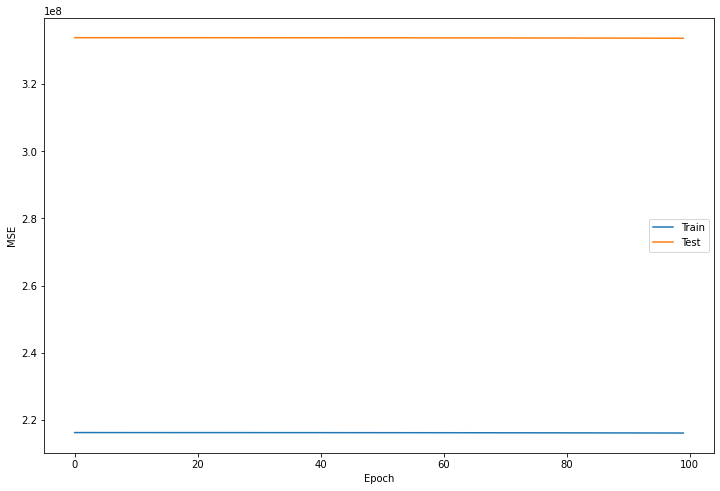

In [19]:
## visualizing results
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,8))
plt.plot(history2.history2['loss'])
plt.plot(history2.history2['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Train', 'Test'])
plt.show();

In [21]:
## Model 2 has a smaller MSE